## The simplest exemple of convolution with Numpy

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load the image

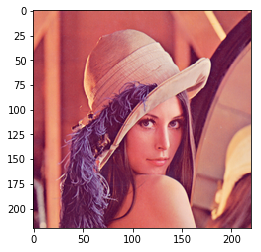

In [2]:
img = cv2.imread("lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(220, 220)

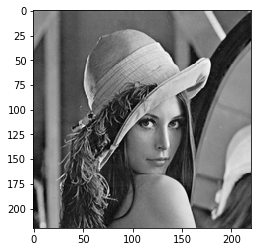

In [4]:
plt.imshow(img, cmap='gray')

### Filters configuration

In [5]:
kernel_size = 3
stride = 1

### Create feature map

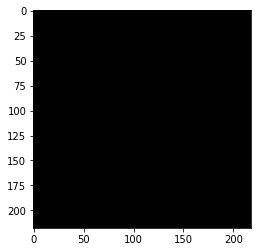

In [6]:
feature_map_size = ((img.shape[0] - kernel_size) // stride) + 1
feature_map = np.zeros((feature_map_size, feature_map_size))

plt.imshow(feature_map, cmap='gray')

### Convolution algorithm

In [7]:
def convolve(image, feature_map, feature_map_size, kernel, kernel_size, stride):
    for i in range(0, feature_map_size, stride):
        for j in range(0, feature_map_size, stride):
            feature_map[i, j] = np.sum(img[i:i+kernel_size, j:j+kernel_size] * kernel)
            
    return feature_map

### 1st filter: outline

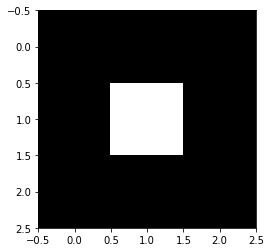

In [8]:
# Outline
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

plt.imshow(kernel, cmap='gray')

#### Apply convolution

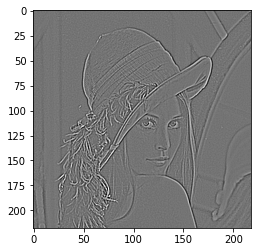

In [9]:
outline = convolve(img, feature_map, feature_map_size, kernel, kernel_size, stride)
plt.imshow(outline, cmap='gray')

### 2nd filter: top sobel

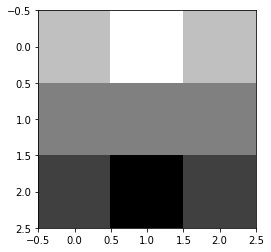

In [10]:
# Top sobel
kernel = np.array([[ 1,   2,  1],
                   [ 0,   0,  0],
                   [-1,  -2, -1]])

plt.imshow(kernel, cmap='gray')

#### Apply convolution

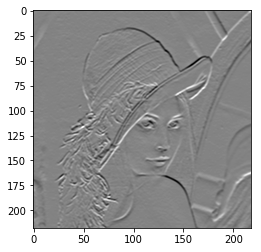

In [12]:
top_sobel = convolve(img, feature_map, feature_map_size, kernel, kernel_size, stride)
plt.imshow(top_sobel, cmap='gray')

### 3rd filter: blur

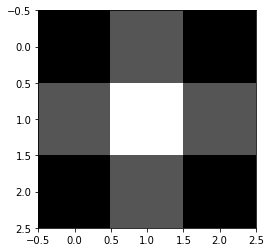

In [13]:
# Blur
kernel = np.array([[0.0625, 0.125, 0.0625],
                   [ 0.125,  0.25,  0.125],
                   [0.0625, 0.125, 0.0625]])

plt.imshow(kernel, cmap='gray')

#### Apply convolution

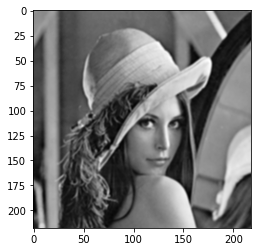

In [14]:
blur = convolve(img, feature_map, feature_map_size, kernel, kernel_size, stride)
plt.imshow(blur, cmap='gray')